<a href="https://colab.research.google.com/github/sumanjitmoshat/ClassicalML/blob/master/Naive_Bayes_bases_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# importing packages and libraries 
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# connecting with kaggle to download the dataset 
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ozlerhakan/spam-or-not-spam-dataset
!mkdir spamhamdataset
! unzip spam-or-not-spam-dataset.zip -d spamhamdataset

  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 80.8MB/s]
Archive:  spam-or-not-spam-dataset.zip
  inflating: spamhamdataset/spam_or_not_spam.csv  


In [6]:
# changing directory to the folder which contains the csv
cd spamhamdataset/

In [9]:
# loading the csv in a dataset
email_df = pd.read_csv('spam_or_not_spam.csv')

In [10]:
# checking the first few elements of a dataset
email_df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [11]:
# checking the total length of the dataset
len(email_df)

3000

In [12]:
#ham - 0 spam - 1
# there are total 3000 records out of which 2500 are of ham class and 500 are of spam class
ham_spam =  email_df.label.value_counts()
ham_spam

0    2500
1     500
Name: label, dtype: int64

In [13]:
# checking the spam rate
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 17%


In [15]:
# splitting the dataset into feature and target variables
X = email_df.email
y = email_df.label

In [17]:
#  splitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# checking the first few elements of the train fetures
X_train.head()

216     paul jakma wrote on tue NUMBER aug NUMBER davi...
510     on sun NUMBER sep NUMBER cdale wrote i agree w...
2366    url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...
1587    hi is it possible to use razor without filteri...
592     on mon NUMBER sep NUMBER stephen d williams wr...
Name: email, dtype: object

In [19]:
# checking the first few elements of the target variable
y_train.head()

216     0
510     0
2366    0
1587    0
592     0
Name: label, dtype: int64

In [24]:
# initializing the count vectorizer
vect = CountVectorizer(stop_words='english')

In [26]:
# fitting the vectorizer on train values. 
vect.fit(X_train.astype('U').values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
# checking the count of words in the vocabulary 
vect.vocabulary_

{'paul': 18845,
 'jakma': 12825,
 'wrote': 28443,
 'tue': 26265,
 'number': 16830,
 'aug': 1918,
 'david': 5920,
 'neary': 16311,
 'actually': 523,
 'following': 9337,
 'way': 27819,
 'sensible': 22948,
 'echo': 7494,
 'enc': 7837,
 'sed': 22844,
 'numbera': 16845,
 'fa': 8662,
 'lines': 14293,
 'attempting': 1864,
 'realised': 21023,
 'straight': 24450,
 'swap': 24911,
 'awk': 2047,
 'gensub': 10006,
 'insert': 12256,
 'perl': 19030,
 'pack': 18573,
 'job': 13048,
 'ps': 20352,
 'late': 13873,
 'reply': 21571,
 'footer': 9363,
 'original': 18290,
 'mail': 14796,
 'received': 21095,
 'error': 8179,
 'yadda': 28709,
 'got': 10320,
 'caught': 3850,
 'spam': 23923,
 'filter': 9046,
 'ended': 7872,
 'junkmail': 13189,
 'directory': 6683,
 'check': 4106,
 'headers': 10942,
 'worse': 28376,
 'bodycheck': 2913,
 'showed': 23258,
 'remove': 21499,
 'url': 27023,
 'need': 16330,
 'new': 16450,
 'want': 27735,
 'able': 311,
 'process': 20112,
 'false': 8745,
 'positives': 19699,
 'dump': 7348,
 

In [28]:
# checking the total length of the vocabulary
len(vect.vocabulary_.keys())

29248

In [30]:
# transforming the X_train and X_test
X_train_transformed = vect.transform(X_train.astype('U').values)
X_test_transformed = vect.transform(X_test.astype('U').values)

In [31]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 311)	1
  (0, 523)	2
  (0, 1864)	1
  (0, 1918)	1
  (0, 2047)	1
  (0, 2913)	1
  (0, 2940)	1
  (0, 3850)	1
  (0, 4106)	1
  (0, 4129)	1
  (0, 5918)	1
  (0, 5920)	2
  (0, 6683)	1
  (0, 7348)	1
  (0, 7494)	2
  (0, 7837)	1
  (0, 7872)	1
  (0, 8179)	1
  (0, 8662)	1
  (0, 8745)	1
  (0, 9046)	2
  (0, 9337)	1
  (0, 9363)	2
  (0, 9534)	1
  (0, 10006)	1
  :	:
  (2249, 19362)	1
  (2249, 19409)	1
  (2249, 20243)	1
  (2249, 20718)	1
  (2249, 21074)	3
  (2249, 21192)	2
  (2249, 21201)	2
  (2249, 22068)	2
  (2249, 22152)	1
  (2249, 22219)	11
  (2249, 22226)	1
  (2249, 23890)	2
  (2249, 24158)	4
  (2249, 24832)	1
  (2249, 25457)	1
  (2249, 25516)	1
  (2249, 25521)	1
  (2249, 25589)	1
  (2249, 26156)	1
  (2249, 27023)	6
  (2249, 27072)	3
  (2249, 27735)	1
  (2249, 28202)	2
  (2249, 28351)	1
  (2249, 28443)	1


In [33]:
# initializing the model
mnb = MultinomialNB()
# fit
mnb.fit(X_train_transformed,y_train)
# predict class
y_pred_class = mnb.predict(X_test_transformed)
# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [34]:
# checking the config of the model
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
# checking the accuracy of the model on the test dataset
metrics.accuracy_score(y_test, y_pred_class)

0.9906666666666667

In [38]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[620,   1],
       [  6, 123]])

In [39]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[620   1]
 [  6 123]]


In [40]:
# checking sensitivity 
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9534883720930233


In [41]:
# checking specificity
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.998389694041868


In [42]:
# checking precision
precision = TP / float(TP + FP)
print("precision",precision)

precision 0.9919354838709677


In [43]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

PRECISION SCORE : 0.9919354838709677
RECALL SCORE : 0.9534883720930233
F1 SCORE : 0.9723320158102766


In [45]:
# creating the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [46]:
print (roc_auc)

0.9929471095632201


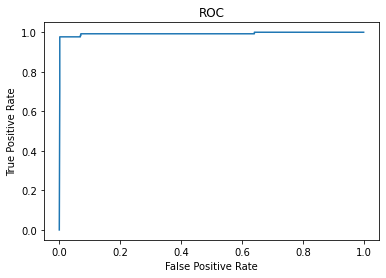

In [47]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [48]:
# It can be conluded that this is a pretty good model as it satisfies all the metrics 